In [1]:
import toytree
import toyplot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42

In [4]:
%%bash
source ~/.bashrc
conda activate assembly
seqkit stats ../acropora_cafe5/SpeciesTreeAlignment.fa

file                                       format  type     num_seqs    sum_len  min_len  avg_len  max_len
../acropora_cafe5/SpeciesTreeAlignment.fa  FASTA   Protein        21  7,322,952  348,712  348,712  348,712


In [6]:
tmp = pd.read_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/acropora_cafe5/N0.tsv", sep = "\t")
tmp = tmp[list(tmp.columns[0:1]) + list(tmp.columns[3:])]

/storage/group/ibb3/default/.conda/envs/networkx/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3221: DtypeWarning: Columns (3,4,5,6,7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
genes = tmp.copy()
for i in genes.columns[1:]:
    genes[i] = genes[i].str.split(',', expand=False).str.len().fillna(0).astype(int)

In [8]:
genes["Desc"] = "(null)"

In [9]:
genes.columns = ['Family ID', 'acer', 'ahya', 'apal', 'cxam', 'cjar', 
                 'acer_k2', 'adig', 'edia', 'ofav', 'spis', 'amil', 
                 'xspp', 'hspp', 'nvec', 'hsym', 'mcap', 'scal',
                 'afen', 'aten', 'dspp', 'rspp', 'Desc']

In [10]:
genes = genes[['Desc', "Family ID", 'acer', 'ahya', 'apal', 'cxam', 'cjar', 
                 'acer_k2', 'adig', 'edia', 'ofav', 'spis', 'amil', 
                 'xspp', 'hspp', 'nvec', 'hsym', 'mcap', 'scal',
                 'afen', 'aten', 'dspp', 'rspp']]

In [11]:
genes["occupancy"] = genes[['acer', 'ahya', 'apal', 'cxam', 'cjar', 
                 'acer_k2', 'adig', 'edia', 'ofav', 'spis', 'amil', 
                 'xspp', 'hspp', 'nvec', 'hsym', 'mcap', 'scal',
                 'afen', 'aten', 'dspp', 'rspp']].astype(bool).sum(axis=1)

In [12]:
genes = genes[genes["occupancy"] > 2].reset_index(drop=True)
genes = genes[['Desc', "Family ID", 'acer', 'ahya', 'apal', 'cxam', 'cjar', 
                 'acer_k2', 'adig', 'edia', 'ofav', 'spis', 'amil', 
                 'xspp', 'hspp', 'nvec', 'hsym', 'mcap', 'scal',
                 'afen', 'aten', 'dspp', 'rspp']]

In [13]:
genes.set_index("Desc").to_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/acropora_cafe5/cafe_input.tsv", sep = "\t")

In [16]:
%%bash
source ~/.bashrc
conda activate py2
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/acropora_cafe5/
python /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/clade_and_size_filter.py \
    -i cafe_input.tsv \
    -o cafe_input_filtered.tsv -s

Below are our time calibrations for the phylogeny:

In [18]:
!cat ../acropora_cafe5/r8s_input.txt

#NEXUS
begin trees;
tree nj_tree = [&R] ((cxam:0.523243,(hsym:0.29421,hspp:0.394861)1:0.279265)1:0.139656,((xspp:0.325831,rspp:0.320845)1:0.331395,(((nvec:0.202374,scal:0.210889)1:0.11379,edia:0.321769)1:0.144663,((dspp:0.0575246,afen:0.0579021)1:0.185905,(((cjar:0.0444369,ofav:0.0353221)1:0.0827746,spis:0.167311)1:0.0528559,(mcap:0.1128,(aten:0.0295236,((apal:0.0140189,(acer:0.00390324,acer_k2:0.00730748)1:0.00160677)1:0.00780289,((amil:0.00467605,ahya:0.0289963)1:0.00237188,adig:0.020875)1:0.00347086)1:0.0100377)1:0.118962)1:0.128221)1:0.067614)1:0.195569)1:0.191006)1:0.139656);
End;
begin rates;
blformat nsites=348712 lengths=persite ultrametric=no;
collapse;
mrca acroporidae mcap acer;
fixage taxon=acroporidae age=168;
mrca acropora aten acer;
fixage taxon=acropora age=101;
mrca scleractinia spis ahya;
fixage taxon=scleractinia age=268;
mrca anthozoa rspp ahya;
fixage taxon=anthozoa age=541;
divtime method=pl algorithm=tn cvStart=0 cvInc=0.5 cvNum=8 crossv=yes;
describe plot=chrono

In [ ]:
%%bash
source ~/.bashrc
conda activate orthofinder
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/r8s1.81/src/
./r8s \
    -b -f /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/acropora_cafe5/r8s_input.txt \
    > /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/acropora_cafe5/r8s_calibrated.txt

In [19]:
%%bash
tail -n 1 ../acropora_cafe5/r8s_calibrated.txt | cut -c 16- \
    > ../acropora_cafe5/r8s_calibrated_ultrametric.txt

In [23]:
!cat ../acropora_cafe5/r8s_calibrated_ultrametric.txt

(((hsym:312.628172,hspp:312.628172)1:239.246274,cxam:551.874445)1:129.483573,((xspp:280.229377,rspp:280.229377)1:260.770623,(((nvec:194.493133,scal:194.493133)1:104.576930,edia:299.070063)1:128.330309,((dspp:63.805865,afen:63.805865)1:240.650937,(((cjar:47.339188,ofav:47.339188)1:127.644645,spis:174.983833)1:93.016167,(((((acer:7.932931,acer_k2:7.932931)1:4.262289,apal:12.195219)1:15.920904,((amil:19.574712,ahya:19.574712)1:3.467736,adig:23.042447)1:5.073676)1:72.883877,aten:101.000000)acropora:67.000000,mcap:168.000000)acroporidae:100.000000)scleractinia:36.456802)1:122.943570)1:113.599628)anthozoa:140.358019);


In [ ]:
(((hsym:312.160443,hspp:312.160443)1:239.115171,cxam:551.275614)1:129.538162,((xspp:280.036583,rspp:280.036583)1:260.963417,(((nvec:194.442487,scal:194.442487)1:104.597649,edia:299.040136)1:128.420837,((dspp:63.884888,afen:63.884888)1:240.632247,(((cjar:47.495498,ofav:47.495498)1:127.804895,spis:175.300394)1:92.699606,(((((acer:7.935254,acer_k2:7.935254)1:4.321656,apal:12.256910)1:15.989231,((amil:19.709155,ahya:19.709155)1:3.457308,adig:23.166463)1:5.079678)1:72.753859,aten:101.000000):67.000000,mcap:168.000000):100.000000):36.517135)1:122.943838)1:113.539027):139.813776);

In [22]:
newick = "(((hsym:312.628172,hspp:312.628172)1:239.246274,cxam:551.874445)1:129.483573,((xspp:280.229377,rspp:280.229377)1:260.770623,(((nvec:194.493133,scal:194.493133)1:104.576930,edia:299.070063)1:128.330309,((dspp:63.805865,afen:63.805865)1:240.650937,(((cjar:47.339188,ofav:47.339188)1:127.644645,spis:174.983833)1:93.016167,(((((acer:7.932931,acer_k2:7.932931)1:4.262289,apal:12.195219)1:15.920904,((amil:19.574712,ahya:19.574712)1:3.467736,adig:23.042447)1:5.073676)1:72.883877,aten:101.000000):67.000000,mcap:168.000000):100.000000):36.456802)1:122.943570)1:113.599628):140.358019);"
tre0 = toytree.tree(newick, tree_format=0)
canvas = toyplot.Canvas(width=400, height=400)
axes = canvas.cartesian()
axes.show = True
rtre0 = tre0
rtre0.draw(tip_labels=True, tree_style = "n", 
           axes = axes, tip_labels_align=True, scalebar = True)
import toyplot.pdf
toyplot.pdf.render(canvas, "../acropora_cafe5/tree-plot.pdf")

In [24]:
%%bash
cd ../acropora_cafe5
sbatch ./cafe5_error.sh
cat ./cafe5_error.sh

Submitted batch job 11165087
#!/bin/bash
#SBATCH --nodes=1
#SBATCH --ntasks=20
#SBATCH --mem=128GB
#SBATCH --time=48:00:00
#SBATCH --job-name=cafe5
#SBATCH --account=open

source ~/.bashrc
conda activate /storage/group/ibb3/default/.conda/envs/orthofinder
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/acropora_cafe5
cafe5 -t r8s_calibrated_ultrametric.txt \
    -i cafe_input_filtered.tsv \
    -c 20 -e -o .


In [25]:
%%bash
cd ../acropora_cafe5
sbatch ./cafe5.sh
cat ./cafe5.sh

Submitted batch job 11165234
#!/bin/bash
#SBATCH --nodes=1
#SBATCH --ntasks=20
#SBATCH --mem=128GB
#SBATCH --time=48:00:00
#SBATCH --job-name=cafe5
#SBATCH --account=open

source ~/.bashrc
conda activate /storage/group/ibb3/default/.conda/envs/orthofinder
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/acropora_cafe5
cafe5 -t r8s_calibrated_ultrametric.txt \
    -i cafe_input_filtered.tsv \
    -c 20 -eBase_error_model.txt \
    -o cafe_final


In [3]:
significance = pd.read_csv('../acropora_cafe5/cafe_final/Base_branch_probabilities.tab', sep = "\t")
change = pd.read_csv('../acropora_cafe5/cafe_final/Base_change.tab', sep = "\t")

These column names are not entirely help, so we'll plot the output tree from CAFE using ToyTree so we can see which notes each number corresponds with:

In [31]:
newick = "(((hsym1,hspp2)24,cxam3)23,((xspp4,rspp5)26,(((nvec6,scal7)29,edia8)28,((dspp9,afen10)31,(((cjar11,ofav12)34,spis13)33,(((((acer14,acer_k215)39,apal16)38,((amil17,ahya18)41,adig19)40)37,aten20)36,mcap21)35)32)30)27)25)22;"
tre0 = toytree.tree(newick, tree_format=0)
canvas = toyplot.Canvas(width=400, height=400)
axes = canvas.cartesian()
axes.show = True
rtre0 = tre0
rtre0.draw(tip_labels=True, tree_style = "n", 
           axes = axes, tip_labels_align=True, 
           node_labels = 'support',  node_sizes=15, scalebar = True)

(None,
 <toytree.Render.ToytreeMark at 0x14ee5e02af10>)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="400.0px" height="400.0px" viewBox="0 0 400.0 400.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t4825b477ecce40fbbc94c65d27b912fa"> 41 39 40 38 37 36 34 35 33 32 31 29 30 28 27 26 24 25 23 ahya18 amil17 adig19 acer_k215 acer14 apal16 aten20 mcap21 ofav12 cjar11 spis13 afen10 dspp9 scal7 nvec6 edia8 rspp5 xspp4 hspp2 hsym1 cxam3 0 5 10

In [4]:
significance.columns = ["FamilyID"] + list(range(1,42))
change.columns = ["FamilyID"] + list(range(1,42))

In [35]:
nodes = pd.DataFrame(rtre0.get_node_values("support"))

In [36]:
!mkdir -p ../acropora_cafe5/genefamilychange/

In [7]:
for i in list(range(1,42)):
    increase = change[["FamilyID", i]][change[i] > 0][change["FamilyID"].isin(significance["FamilyID"][significance[i] < 0.05])] 
    increase.set_index("FamilyID").to_csv("../acropora_cafe5/genefamilychange/" + str(i) + "_increase.tsv", sep = "\t")
    decrease = change[["FamilyID", i]][change[i] < 0][change["FamilyID"].isin(significance["FamilyID"][significance[i] < 0.05])]
    decrease.set_index("FamilyID").to_csv("../acropora_cafe5/genefamilychange/" + str(i) + "_decrease.tsv", sep = "\t")

/tmp/ipykernel_3815769/485442138.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  increase = change[["FamilyID", i]][change[i] > 0][change["FamilyID"].isin(significance["FamilyID"][significance[i] < 0.05])]
/tmp/ipykernel_3815769/485442138.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  decrease = change[["FamilyID", i]][change[i] < 0][change["FamilyID"].isin(significance["FamilyID"][significance[i] < 0.05])]
/tmp/ipykernel_3815769/485442138.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  increase = change[["FamilyID", i]][change[i] > 0][change["FamilyID"].isin(significance["FamilyID"][significance[i] < 0.05])]
/tmp/ipykernel_3815769/485442138.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  decrease = change[["FamilyID", i]][change[i] < 0][change["FamilyID"].isin(significance["FamilyID"][significance[i] < 0.05])]
/tmp/ipykernel_3815769/485442138

/tmp/ipykernel_3815769/485442138.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  increase = change[["FamilyID", i]][change[i] > 0][change["FamilyID"].isin(significance["FamilyID"][significance[i] < 0.05])]
/tmp/ipykernel_3815769/485442138.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  decrease = change[["FamilyID", i]][change[i] < 0][change["FamilyID"].isin(significance["FamilyID"][significance[i] < 0.05])]
/tmp/ipykernel_3815769/485442138.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  increase = change[["FamilyID", i]][change[i] > 0][change["FamilyID"].isin(significance["FamilyID"][significance[i] < 0.05])]
/tmp/ipykernel_3815769/485442138.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  decrease = change[["FamilyID", i]][change[i] < 0][change["FamilyID"].isin(significance["FamilyID"][significance[i] < 0.05])]
/tmp/ipykernel_3815769/485442138

In [8]:
nodevals = {}
for i in list(range(1,42)):
    nodevals[str(i)] = ("+" + str(len(change[change[i] > 0]
                                      [change["FamilyID"].isin(significance["FamilyID"][significance[i] < 0.05])])) + 
                        "/-" + str(len(change[change[i] < 0]
                                       [change["FamilyID"].isin(significance["FamilyID"][significance[i] < 0.05])])))
nodevals = pd.DataFrame(nodevals, index=[0]).T.reset_index(drop=False)
nodevals.columns = [0, "vals"]

/tmp/ipykernel_3815769/2396848221.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nodevals[str(i)] = ("+" + str(len(change[change[i] > 0]
/tmp/ipykernel_3815769/2396848221.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "/-" + str(len(change[change[i] < 0]
/tmp/ipykernel_3815769/2396848221.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nodevals[str(i)] = ("+" + str(len(change[change[i] > 0]
/tmp/ipykernel_3815769/2396848221.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "/-" + str(len(change[change[i] < 0]
/tmp/ipykernel_3815769/2396848221.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nodevals[str(i)] = ("+" + str(len(change[change[i] > 0]
/tmp/ipykernel_3815769/2396848221.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "/-" + str(len(change[change[i] < 0]
/tmp/ipykerne

In [ ]:
nodes = nodes.merge(nodevals,how = "left", on = 0).fillna("")

In [41]:
newick = "(((hsym:312.628172,hspp:312.628172)1:239.246274,cxam:551.874445)1:129.483573,((xspp:280.229377,rspp:280.229377)1:260.770623,(((nvec:194.493133,scal:194.493133)1:104.576930,edia:299.070063)1:128.330309,((dspp:63.805865,afen:63.805865)1:240.650937,(((cjar:47.339188,ofav:47.339188)1:127.644645,spis:174.983833)1:93.016167,(((((acer:7.932931,acer_k2:7.932931)1:4.262289,apal:12.195219)1:15.920904,((amil:19.574712,ahya:19.574712)1:3.467736,adig:23.042447)1:5.073676)1:72.883877,aten:101.000000):67.000000,mcap:168.000000):100.000000):36.456802)1:122.943570)1:113.599628):140.358019);"
tre0 = toytree.tree(newick, tree_format=0)
canvas = toyplot.Canvas(width=400, height=400)
axes = canvas.cartesian()
axes.show = True
rtre0 = tre0
rtre0.draw(tip_labels=True, tree_style = "n", 
           axes = axes, tip_labels_align=True, 
           node_labels = nodes["vals"].tolist(),
           scalebar = True)
import toyplot.pdf
toyplot.pdf.render(canvas, "../acropora_cafe5/tree-plot.pdf")

In [42]:
newick = "(((hsym:312.628172,hspp:312.628172)1:239.246274,cxam:551.874445)1:129.483573,((xspp:280.229377,rspp:280.229377)1:260.770623,(((nvec:194.493133,scal:194.493133)1:104.576930,edia:299.070063)1:128.330309,((dspp:63.805865,afen:63.805865)1:240.650937,(((cjar:47.339188,ofav:47.339188)1:127.644645,spis:174.983833)1:93.016167,(((((acer:7.932931,acer_k2:7.932931)1:4.262289,apal:12.195219)1:15.920904,((amil:19.574712,ahya:19.574712)1:3.467736,adig:23.042447)1:5.073676)1:72.883877,aten:101.000000):67.000000,mcap:168.000000):100.000000):36.456802)1:122.943570)1:113.599628):140.358019);"
tre0 = toytree.tree(newick, tree_format=0)
canvas = toyplot.Canvas(width=400, height=400)
axes = canvas.cartesian()
axes.show = True
rtre0 = tre0
rtre0.draw(tip_labels=True, tree_style = "n", 
           axes = axes, tip_labels_align=True, 
           node_labels = nodes["vals"].tolist(),
           scalebar = True)

(None,
 <toytree.Render.ToytreeMark at 0x14ee5dd91650>)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="400.0px" height="400.0px" viewBox="0 0 400.0 400.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tdfd1dc2c4e8f410ca8b515753a64eac6"> +139/-53 +96/-185 +304/-103 +247/-187 +110/-40 +119/-20 +61/-26 +185/-6 +110/-28 +39/-0 +96/-29 +16/-19 +118/-1 +33/-18 +59/-0 +55/-27 +24/-20 +7/-3 +1/-4 ahya amil adig acer_k2 acer apal aten mcap ofav cjar spis afen dspp scal nvec edia rspp xspp hspp hsym cxam 0 341 681

In [43]:
from upsetplot import from_memberships
from upsetplot import generate_samples
from sklearn.datasets import load_diabetes
from upsetplot import plot
from matplotlib import pyplot
import matplotlib.pyplot as plt
from upsetplot import UpSet
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [44]:
genes = pd.read_csv("../acropora_cafe5/N0.tsv", sep = "\t")
genes = genes[list(genes.columns[3:])]
for i in genes.columns[0:]:
    genes[i] = genes[i].str.split(',', expand=False).str.len().fillna(0).astype(int)

/storage/group/ibb3/default/.conda/envs/networkx/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3221: DtypeWarning: Columns (3,4,5,6,7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [47]:
genes.columns = ["Acropora cervicornis (M5)", 
                 "Acropora hyacinthus", "Acropora palmata",
                 "Cassiopea xamachana", "Catalaphyllia jardinei",
                 "Acropora cervicornis (K2)", "Acropora digitifera", 
                 "Exaiptasia diaphana", "Orbicella faveolata", 
                 "Stylophora pistillata", "Acropora millepora", 
                 "Xenia sp.", "Hydra vulgaris", 
                 "Nematostella vectensis", 
                 "Hydroactinia symbiolongicarpus", 
                 "Montipora capitata", "Scolanthus callimorphus", 
                 "Amplexidiscus fenestrafer", "Acropora tenuis", 
                 "Discosoma sp.", "Renilla muelleri"]

In [48]:
group_dict={}

for index,row  in genes.iterrows():
    for sp,count in row.items():
        if sp != "total" and count != 0:
            group_dict.setdefault(index, []).append(sp)

In [49]:
subsets = [[["Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", 
 "Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana", "Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", "Acropora cervicornis (K2)", 
 "Acropora cervicornis (M5)", "Acropora palmata",
 "Acropora tenuis", "Montipora capitata"], []],
          [["Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", "Acropora cervicornis (K2)", 
 "Acropora cervicornis (M5)", "Acropora palmata",
 "Acropora tenuis"], ["Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", 
 "Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana", "Montipora capitata"]],
          [["Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", "Acropora cervicornis (K2)", 
 "Acropora cervicornis (M5)", "Acropora palmata",
 "Acropora tenuis", "Montipora capitata"], ["Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", 
 "Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana"]],
          [["Acropora cervicornis (K2)", 
 "Acropora cervicornis (M5)", "Acropora palmata"], ["Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", "Acropora tenuis", "Montipora capitata", 
 "Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", 
 "Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana"]],
          [["Acropora cervicornis (K2)", 
 "Acropora cervicornis (M5)", "Acropora palmata", 
 "Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", "Acropora tenuis", "Montipora capitata", 
 "Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", 
 "Renilla muelleri", "Xenia sp."], ["Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana"]],
          [["Acropora cervicornis (K2)", 
 "Acropora cervicornis (M5)", "Acropora palmata", 
 "Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", "Acropora tenuis", "Montipora capitata", 
 "Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata"],["Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", 
 "Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana"]],
          [["Acropora cervicornis (K2)", 
 "Acropora cervicornis (M5)", "Acropora palmata", 
 "Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", "Acropora tenuis", "Montipora capitata", 
 "Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana"], ["Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana"]], 
           [["Acropora cervicornis (K2)"], ["Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", 
 "Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana", "Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", 
 "Acropora cervicornis (M5)", "Acropora palmata",
 "Acropora tenuis", "Montipora capitata"]],
[["Acropora cervicornis (M5)"], ["Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", 
 "Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana", "Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", 
 "Acropora cervicornis (K2)", "Acropora palmata",
 "Acropora tenuis", "Montipora capitata"]],
[["Acropora palmata"], ["Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", 
 "Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana", "Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", 
 "Acropora cervicornis (M5)", "Acropora cervicornis (K2)",
 "Acropora tenuis", "Montipora capitata"]],
[["Acropora palmata", "Acropora cervicornis (K2)"], 
 ["Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", 
 "Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana", "Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", 
 "Acropora cervicornis (M5)",
 "Acropora tenuis", "Montipora capitata"]],
[["Acropora palmata", "Acropora cervicornis (M5)"],
 ["Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", 
 "Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana", "Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", 
 "Acropora cervicornis (K2)",
 "Acropora tenuis", "Montipora capitata"]],
[["Acropora cervicornis (K2)", "Acropora cervicornis (M5)"],
 ["Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", 
 "Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana", "Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", 
 "Acropora palmata",
 "Acropora tenuis", "Montipora capitata"]],]

In [50]:
x = from_memberships(group_dict.values()).sort_values(ascending= False)
x = pd.DataFrame(x)
x = x.reset_index(drop=False)
x = x[["Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", "Acropora cervicornis (K2)", 
 "Acropora cervicornis (M5)", "Acropora palmata",
 "Acropora tenuis", "Montipora capitata", 
 "Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", 
 "Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana",
       "ones"]]

In [51]:
relevantsubsets = pd.DataFrame()
for i in range(len(subsets)):
    tmp = (x[(x[subsets[i][0]] == True).all(axis=1)]
     [(x[subsets[i][1]] == False).all(axis=1)])
    relevantsubsets = pd.concat([relevantsubsets, tmp])

/tmp/ipykernel_1715562/373410482.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = (x[(x[subsets[i][0]] == True).all(axis=1)]
/tmp/ipykernel_1715562/373410482.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = (x[(x[subsets[i][0]] == True).all(axis=1)]
/tmp/ipykernel_1715562/373410482.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = (x[(x[subsets[i][0]] == True).all(axis=1)]
/tmp/ipykernel_1715562/373410482.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = (x[(x[subsets[i][0]] == True).all(axis=1)]
/tmp/ipykernel_1715562/373410482.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = (x[(x[subsets[i][0]] == True).all(axis=1)]
/tmp/ipykernel_1715562/373410482.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = (x[(x[subsets[i][0]] == True).all(axis=1)]
/tmp

In [52]:
x = relevantsubsets.copy()

In [53]:
x = x.set_index(["Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", "Acropora cervicornis (K2)", 
 "Acropora cervicornis (M5)", "Acropora palmata",
 "Acropora tenuis", "Montipora capitata", 
 "Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", 
 "Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana"])

In [54]:
upset = UpSet(x, 
          subset_size='count',
          show_counts=True, 
          sort_by = "cardinality",
          sort_categories_by = "input", 
          min_subset_size=0)

In [55]:
upset.style_subsets( 
                    present = ["Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", 
 "Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana", "Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", "Acropora cervicornis (K2)", 
 "Acropora cervicornis (M5)", "Acropora palmata",
 "Acropora tenuis", "Montipora capitata"], 
                    facecolor = "#F25F5C",
                    edgecolor = "#F25F5C",
                    linewidth = 2)

In [56]:
upset.style_subsets(absent=["Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", 
 "Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana", "Montipora capitata"], 
                    present = ["Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", "Acropora cervicornis (K2)", 
 "Acropora cervicornis (M5)", "Acropora palmata",
 "Acropora tenuis"], 
                    facecolor = "#B33B77",
                    edgecolor = "#B33B77",
                    linewidth = 2)

In [57]:
upset.style_subsets(absent=["Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", 
 "Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana"], 
                    present = ["Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", "Acropora cervicornis (K2)", 
 "Acropora cervicornis (M5)", "Acropora palmata",
 "Acropora tenuis", "Montipora capitata"], 
                    facecolor = "#84732B",
                    edgecolor = "#84732B",
                    linewidth = 2)

In [58]:
upset.style_subsets(absent=["Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", 
 "Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana"],
                    present = ["Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", "Acropora cervicornis (K2)", 
 "Acropora cervicornis (M5)", "Acropora palmata",
 "Acropora tenuis", "Montipora capitata"], 
                    facecolor = "#84732B",
                    edgecolor = "#84732B",
                    linewidth = 2)

In [59]:
upset.style_subsets(absent=["Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", "Acropora tenuis", "Montipora capitata", 
 "Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", 
 "Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana"],
                    present = ["Acropora cervicornis (K2)", 
 "Acropora cervicornis (M5)", "Acropora palmata"], 
                    facecolor = "#FBB116",
                    edgecolor = "#FBB116",
                    linewidth = 2)

In [60]:
upset.style_subsets(absent=["Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana"],
                    present = ["Acropora cervicornis (K2)", 
 "Acropora cervicornis (M5)", "Acropora palmata", 
 "Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", "Acropora tenuis", "Montipora capitata", 
 "Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", 
 "Renilla muelleri", "Xenia sp."] , 
                    facecolor = "#247BA0",
                    edgecolor = "#247BA0",
                    linewidth = 2)

In [61]:
upset.style_subsets(absent=["Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", 
 "Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana"],
                    present = ["Acropora cervicornis (K2)", 
 "Acropora cervicornis (M5)", "Acropora palmata", 
 "Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", "Acropora tenuis", "Montipora capitata", 
 "Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata"], 
                    facecolor = "#70C1B3",
                    edgecolor = "#70C1B3",
                    linewidth = 2)

In [62]:
upset.style_subsets(absent=["Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana"],
                    present = ["Acropora cervicornis (K2)", 
 "Acropora cervicornis (M5)", "Acropora palmata", 
 "Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", "Acropora tenuis", "Montipora capitata", 
 "Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana"] , 
                    facecolor = "#357C3D",
                    edgecolor = "#357C3D",
                    linewidth = 2)

In [63]:
upset.style_subsets(absent=["Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana", "Acropora palmata", 
 "Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", "Acropora tenuis", "Montipora capitata", 
 "Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana"],
                    present = ["Acropora cervicornis (K2)", 
 "Acropora cervicornis (M5)"], 
                    linewidth = 2)

In [64]:
upset.style_subsets(absent=["Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana", "Acropora palmata", 
 "Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", "Acropora tenuis", "Montipora capitata", 
 "Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", "Acropora cervicornis (M5)"],
                    present = "Acropora cervicornis (K2)", 
                    linewidth = 2)

In [65]:
upset.style_subsets(absent=["Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana", "Acropora palmata", 
 "Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", "Acropora tenuis", "Montipora capitata", 
 "Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", "Acropora cervicornis (K2)"],
                    present = "Acropora cervicornis (M5)", 
                    linewidth = 2)

In [66]:
upset.style_subsets(absent=["Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana", "Acropora palmata", 
 "Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", "Acropora tenuis", "Montipora capitata", 
 "Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", "Acropora cervicornis (K2)", "Acropora cervicornis (M5)"],
                    present = "Acropora palmata", 
                    linewidth = 2)

In [67]:
upset.style_subsets(absent=["Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana", "Acropora palmata", 
 "Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", "Acropora tenuis", "Montipora capitata", 
 "Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", "Acropora cervicornis (M5)"],
                    present = ["Acropora cervicornis (K2)", 
 "Acropora palmata"], 
                    linewidth = 2)

In [68]:
upset.style_subsets(absent=["Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana", "Acropora palmata", 
 "Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", "Acropora tenuis", "Montipora capitata", 
 "Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", "Acropora cervicornis (K2)"],
                    present = ["Acropora cervicornis (M5)", 
 "Acropora palmata"], 
                    linewidth = 2)

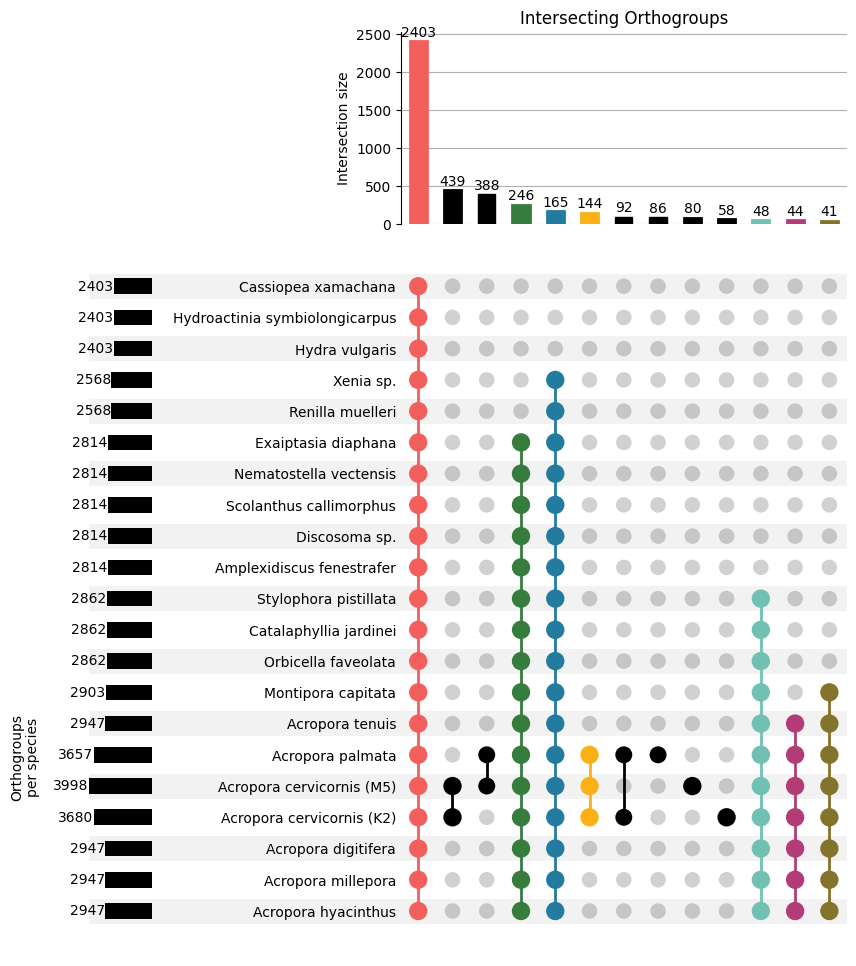

In [70]:
d = upset.plot()
plt.title('Intersecting Orthogroups')
d['totals'].set_title('Orthogroups\nper species', loc = "center", 
                      y = 0.21, x = -1,
                      pad = 6, rotation='vertical', 
                      fontdict = {'fontsize': 10,
                                  'verticalalignment': 'baseline'})
d['totals'].axis('off')
plt.savefig("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/acropora_cafe5/relevant_orthogroups_summary.pdf", dpi = 300)
plt.savefig("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/acropora_cafe5/relevant_orthogroups_summary.png", dpi = 300) 

/storage/group/ibb3/default/.conda/envs/networkx/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3221: DtypeWarning: Columns (3,4,5,6,7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


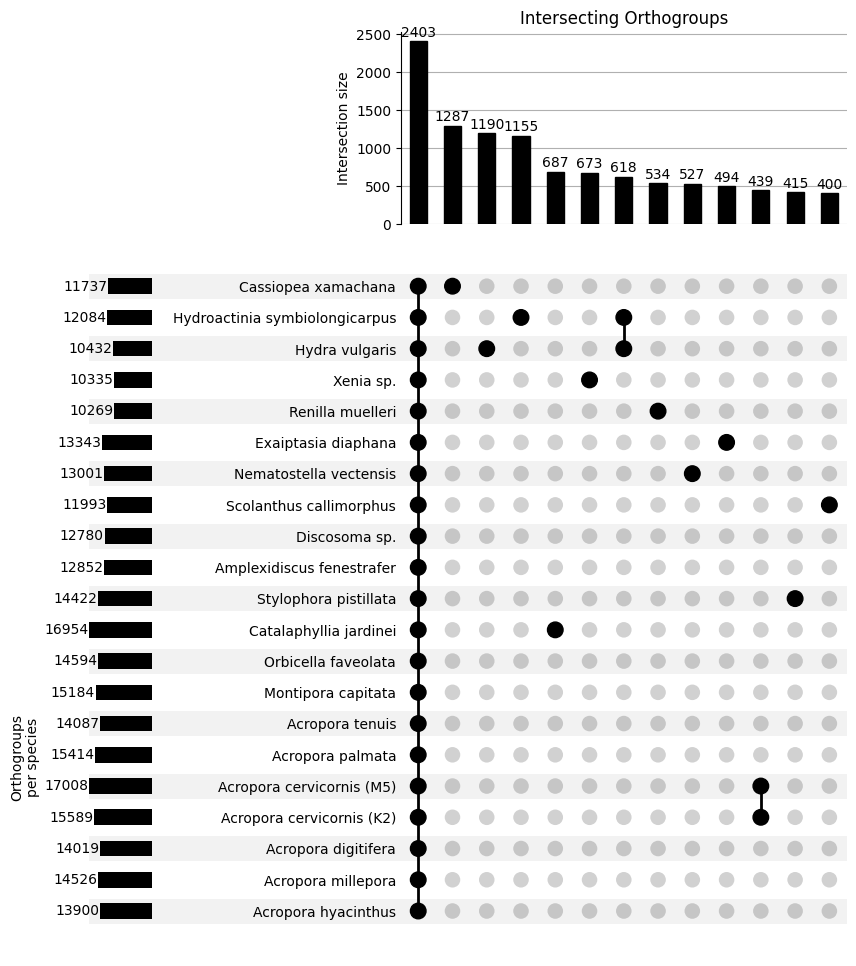

In [71]:
genes = pd.read_csv("../acropora_cafe5/N0.tsv", sep = "\t")
genes = genes[list(genes.columns[3:])]
for i in genes.columns[0:]:
    genes[i] = genes[i].str.split(',', expand=False).str.len().fillna(0).astype(int)
genes.columns = ["Acropora cervicornis (M5)", 
                 "Acropora hyacinthus", "Acropora palmata",
                 "Cassiopea xamachana", "Catalaphyllia jardinei",
                 "Acropora cervicornis (K2)", "Acropora digitifera", 
                 "Exaiptasia diaphana", "Orbicella faveolata", 
                 "Stylophora pistillata", "Acropora millepora", 
                 "Xenia sp.", "Hydra vulgaris", 
                 "Nematostella vectensis", 
                 "Hydroactinia symbiolongicarpus", 
                 "Montipora capitata", "Scolanthus callimorphus", 
                 "Amplexidiscus fenestrafer", "Acropora tenuis", 
                 "Discosoma sp.", "Renilla muelleri"]
group_dict={}

for index,row  in genes.iterrows():
    for sp,count in row.items():
        if sp != "total" and count != 0:
            group_dict.setdefault(index, []).append(sp)
x = from_memberships(group_dict.values()).sort_values(ascending= False)
x = pd.DataFrame(x)
x = x.reset_index(drop=False)
x = x[["Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", "Acropora cervicornis (K2)", 
 "Acropora cervicornis (M5)", "Acropora palmata",
 "Acropora tenuis", "Montipora capitata", 
 "Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", 
 "Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana",
       "ones"]]
x = x.set_index(["Acropora hyacinthus", "Acropora millepora", 
 "Acropora digitifera", "Acropora cervicornis (K2)", 
 "Acropora cervicornis (M5)", "Acropora palmata",
 "Acropora tenuis", "Montipora capitata", 
 "Orbicella faveolata", "Catalaphyllia jardinei",
 "Stylophora pistillata", "Amplexidiscus fenestrafer", 
 "Discosoma sp.", "Scolanthus callimorphus",
 "Nematostella vectensis", "Exaiptasia diaphana", 
 "Renilla muelleri", "Xenia sp.", 
 "Hydra vulgaris", "Hydroactinia symbiolongicarpus" ,
 "Cassiopea xamachana"])
upset = UpSet(x, 
          subset_size='count',
          show_counts=True, 
          sort_by = "cardinality",
          sort_categories_by = "input", 
          min_subset_size=400)
d = upset.plot()
plt.title('Intersecting Orthogroups')
d['totals'].set_title('Orthogroups\nper species', loc = "center", 
                      y = 0.21, x = -1,
                      pad = 6, rotation='vertical', 
                      fontdict = {'fontsize': 10,
                                  'verticalalignment': 'baseline'})
d['totals'].axis('off')
plt.savefig("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/acropora_cafe5/all_orthogroups_summary.pdf", dpi = 300)
plt.savefig("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/acropora_cafe5/all_orthogroups_summary.png", dpi = 300) 

Sheila will run the gene enrichment analyses in R, so I don't have access to those in these notebooks, but we'll discuss them in the paper. Here is the plotting of the enriched GO terms:

In [2]:
nodemap = {"Acroporidae": 35, 
 "Acropora": 36,
 "Caribbean Acropora": 38, 
 "Acropora palmata": 16, 
 "Acropora cervicornis (M5)": 14, 
 "Acropora cervicornis (K2)": 15}

/tmp/ipykernel_3649331/4232533119.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["Count"][len(tmp) - 1] = 0
/tmp/ipykernel_3649331/4232533119.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["Description"][len(tmp) - 1] = ""
/tmp/ipykernel_3649331/4232533119.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["category"][len(tmp) - 1] = i
/tmp/ipykernel_3649331/4232533119.py:20: SettingWithCopyWarning: 
A value i

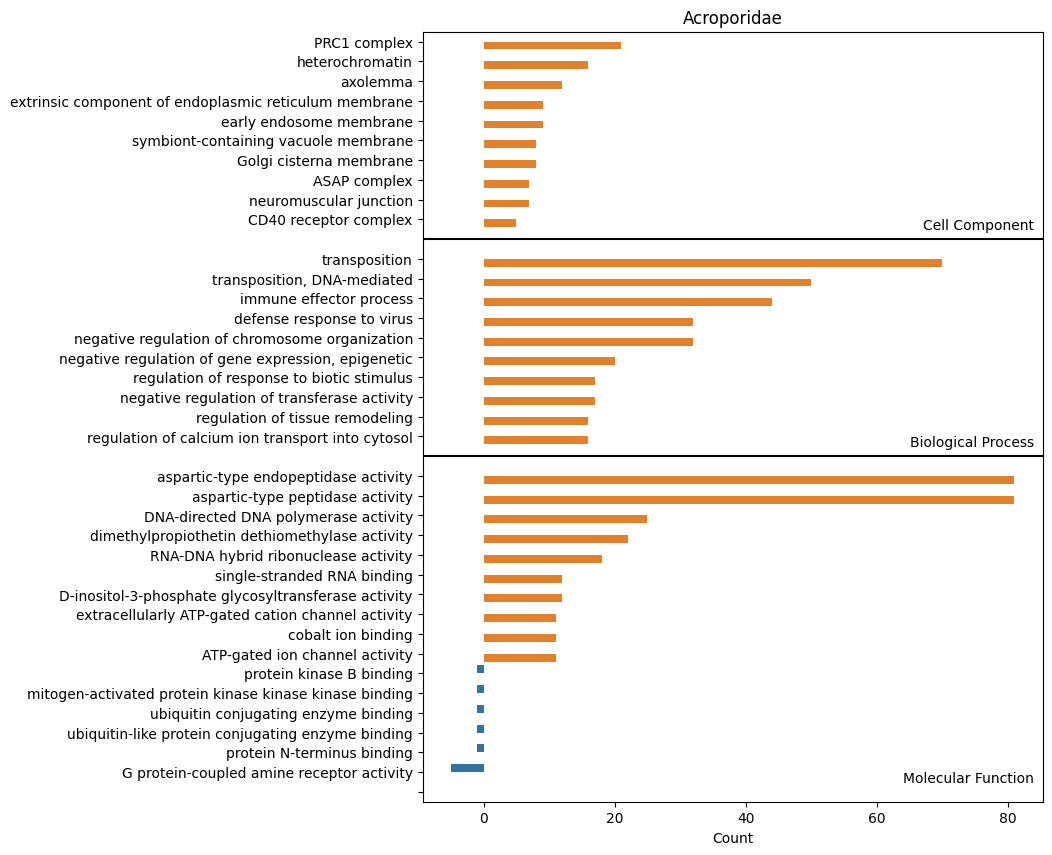

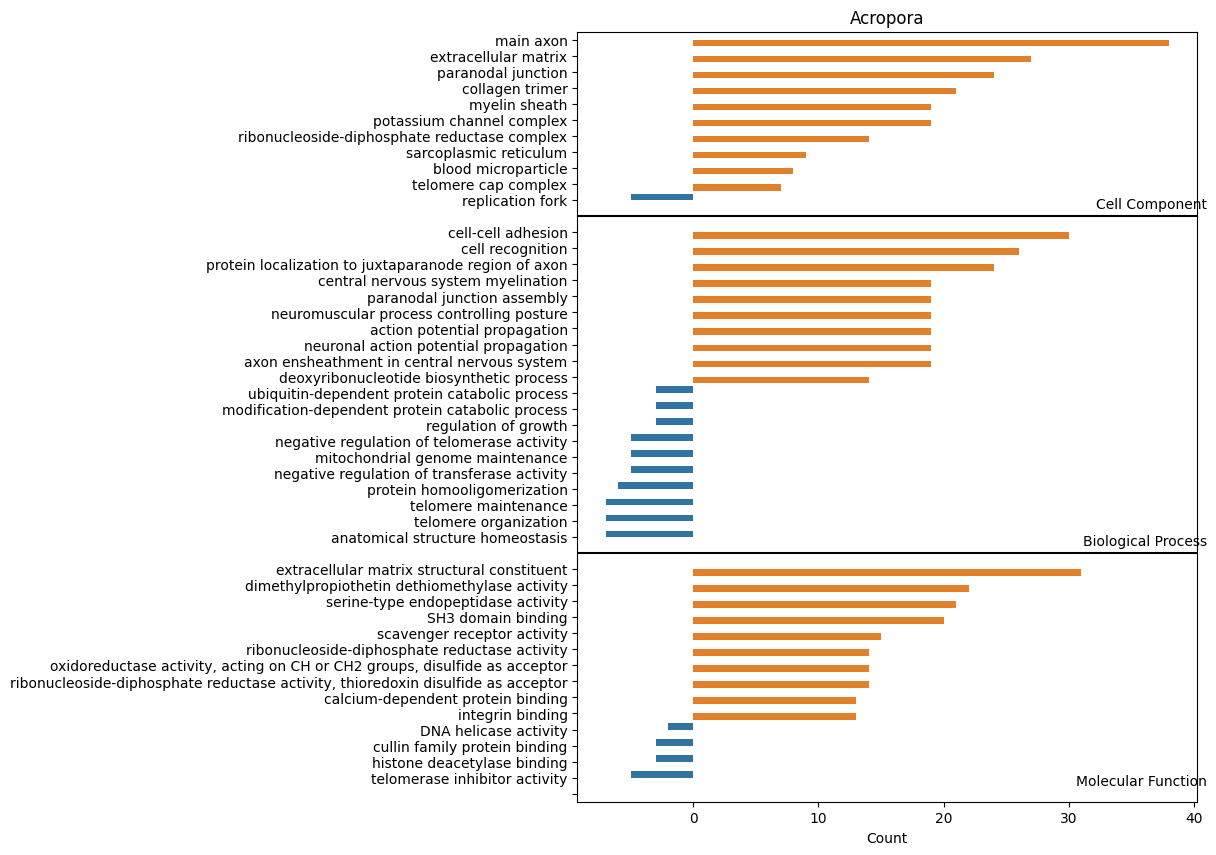

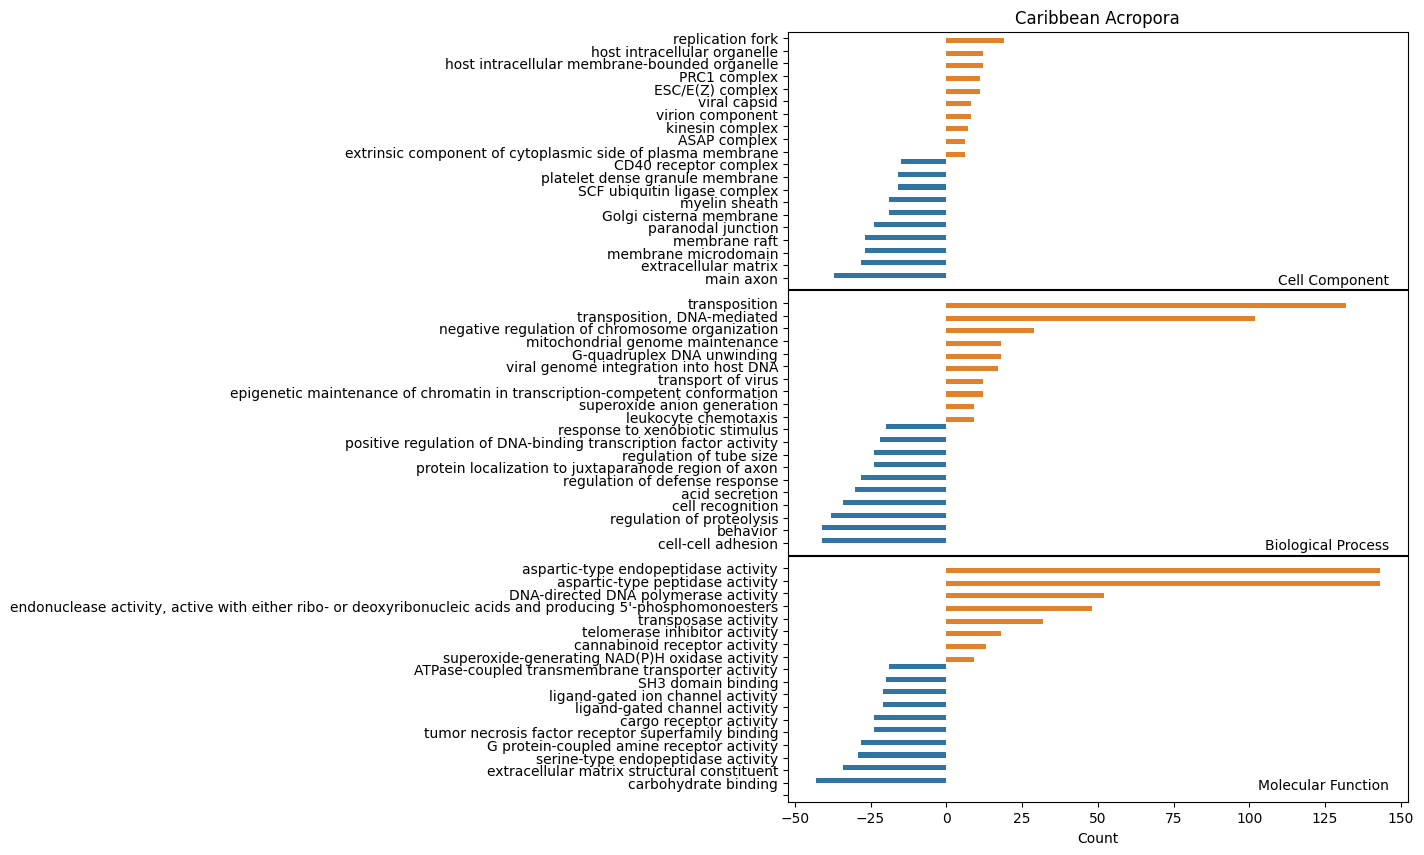

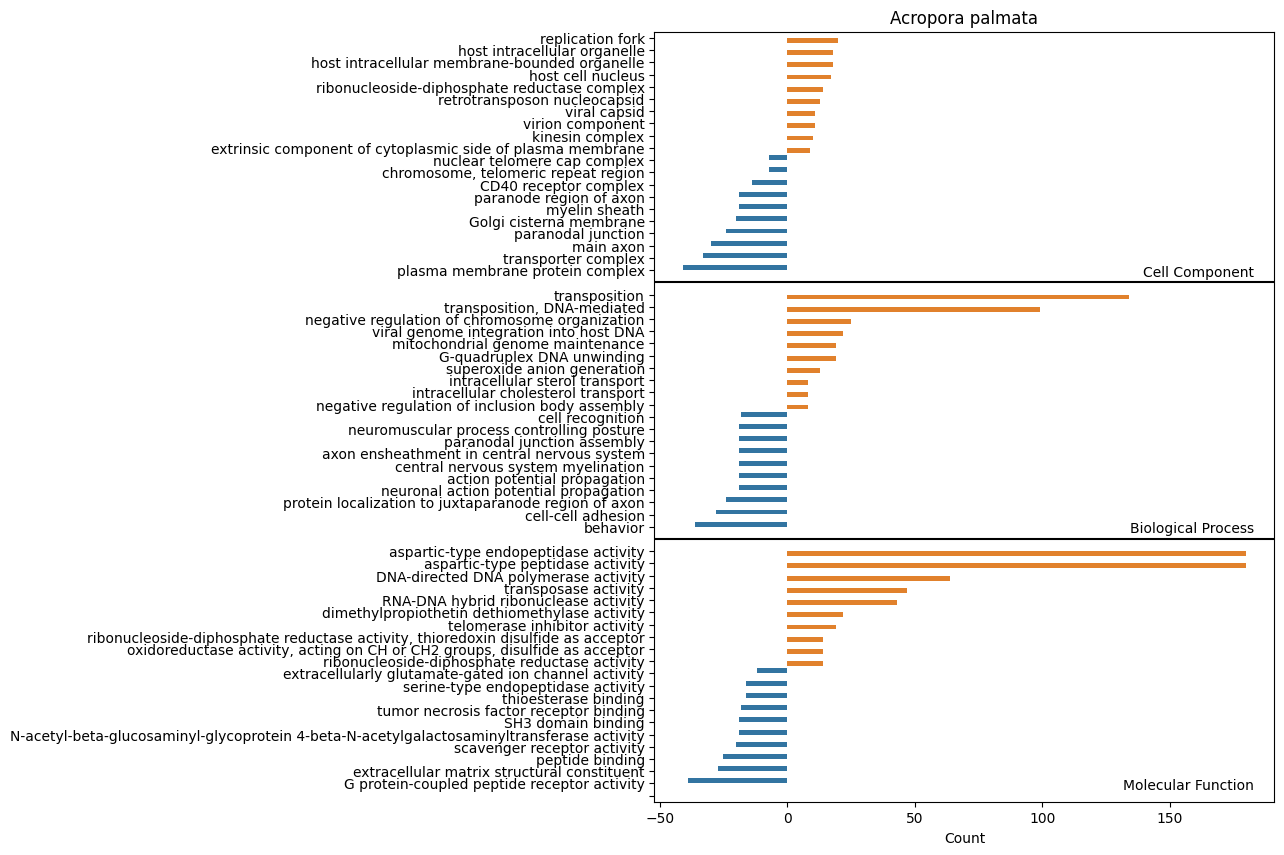

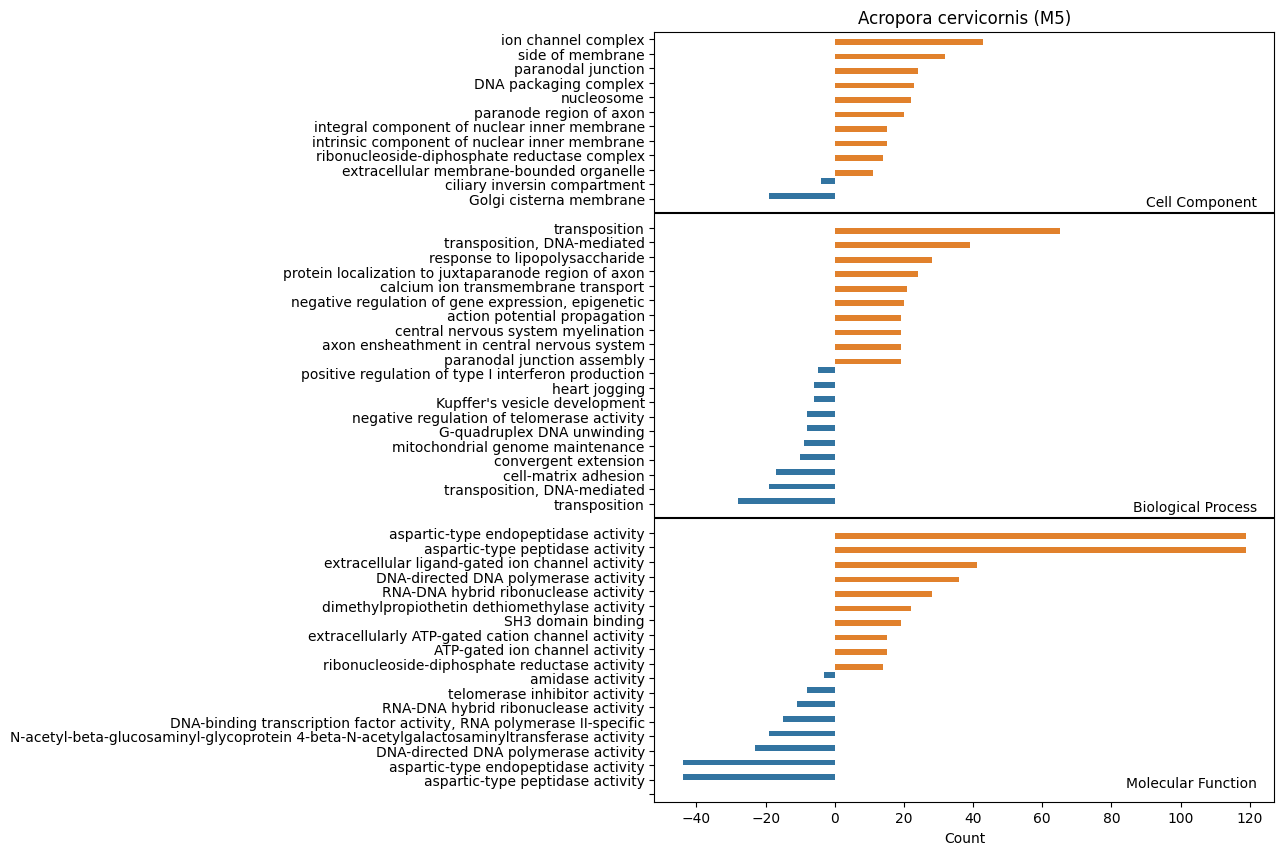

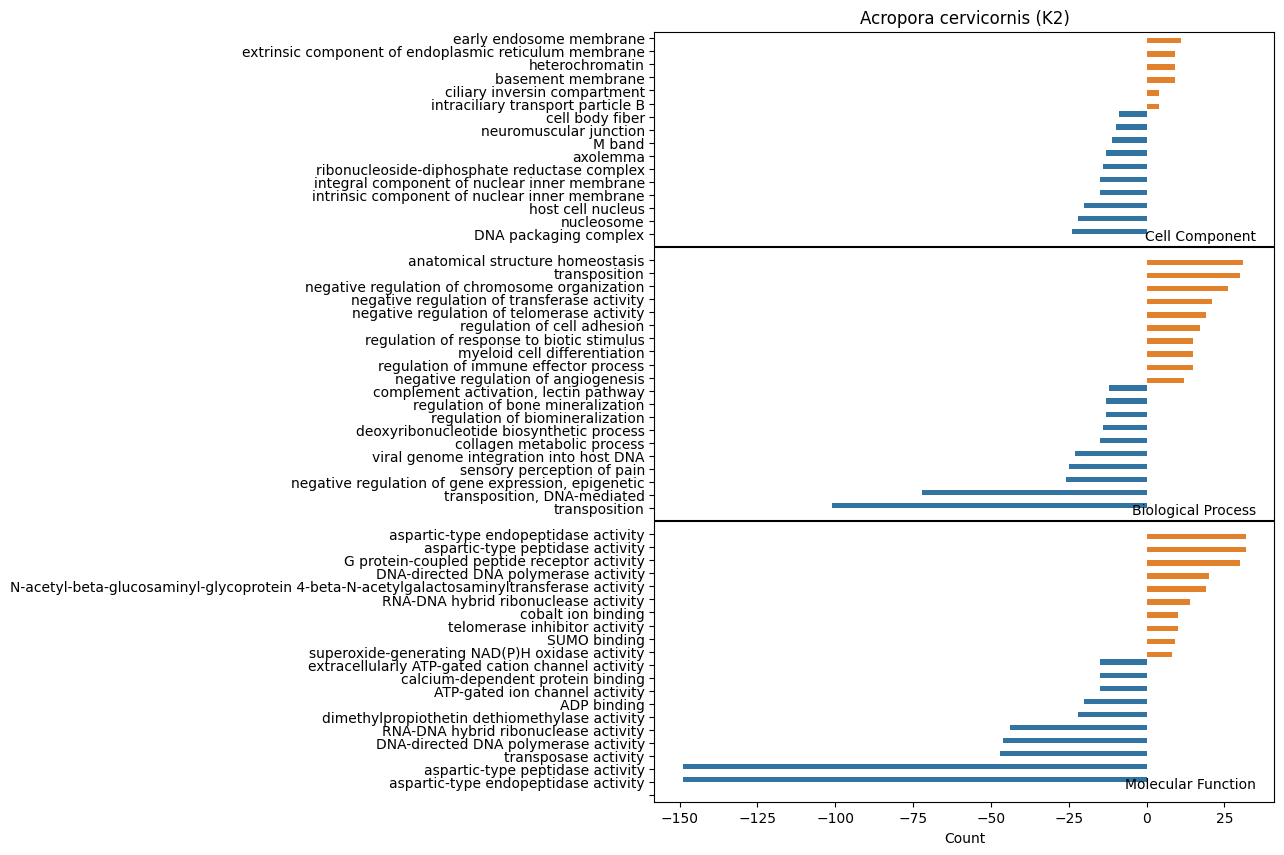

In [25]:
for spp in nodemap:

    plt.figure(figsize=(8,10))

    increase = pd.read_csv("../acropora_cafe5/" + str(nodemap[spp]) + "-increase_GO.txt", sep = "\t")
    decrease = pd.read_csv("../acropora_cafe5/" + str(nodemap[spp]) + "-decrease_GO.txt", sep = "\t")
    increase = increase[increase["p.adjust"] < 0.05].reset_index(drop=True)
    decrease = decrease[decrease["p.adjust"] < 0.05].reset_index(drop=True)
    #increase = increase[~increase["Description"].isin(decrease["Description"].tolist())].reset_index(drop=True)
    #decrease = decrease[~decrease["Description"].isin(increase["Description"].tolist())].reset_index(drop=True)

    change = pd.DataFrame()
    for i in ["cell component", "biological process", "molecular function"]:
        tmp = increase[increase["category"] == i].sort_values("Count", ascending = False).head(10)
        tmp2 = decrease[decrease["category"] == i].sort_values("Count", ascending = True).tail(10)
        tmp2["Count"] = tmp2["Count"] * -1
        tmp = pd.concat([tmp, tmp2]).reset_index(drop=True)
        tmp["Count"] = tmp["Count"].astype(int)
        tmp.loc[len(tmp)] = pd.Series(dtype='float64')
        tmp["Count"][len(tmp) - 1] = 0
        tmp["Description"][len(tmp) - 1] = ""
        tmp["category"][len(tmp) - 1] = i
        change = pd.concat([change, tmp]).reset_index(drop=True)
    
    colors = [1 if c >= 0 else 0 for c in change["Count"]]
    change = change.reset_index(drop=False)
    change["index"] = change["index"].astype(str)
    ax1 = sns.barplot(change, y="index", x="Count", hue = colors, palette = sns.color_palette())
    ax1.set_yticklabels(change["Description"])
    for breakline in change["index"][change["ID"].isna()].tolist()[0:2]:
        plt.axhline(y = int(breakline), color = 'black', linestyle = '-') 
    ax1.set_yticks([i for i in list(ax1.get_yticks()) if str(i) 
      not in change["index"][change["ID"].isna()].tolist()[0:2]])
    ax1.legend_.remove()
    n = 0
    for category in ["cell component", "biological process", "molecular function"]:
        ax1.text(y = int(change["index"][change["ID"].isna()].tolist()[n]) - 0.5, 
                 x = max(change["Count"]) + 3, s = category.title(), ha="right")
        n = n + 1
    plt.ylabel("")
    plt.title(spp)
    plt.savefig("../acropora_cafe5/GO_" + spp.replace(" ", "_") + ".pdf", dpi = 300, bbox_inches='tight')
    plt.savefig("../acropora_cafe5/GO_" + spp.replace(" ", "_") + ".png", dpi = 300, bbox_inches='tight')

In [14]:
increase = pd.read_csv("../acropora_cafe5/14-decrease_GO.txt", sep = "\t")

In [17]:
nodemap

{'Acroporidae': 35,
 'Acropora': 36,
 'Caribbean Acropora': 38,
 'Acropora palmata': 16,
 'Acropora cervicornis (M5)': 14,
 'Acropora cervicornis (K2)': 15}

In [21]:
for spp in ["Caribbean Acropora"]:
    increase = pd.read_csv("../acropora_cafe5/" + str(nodemap[spp]) + "-increase_GO.txt", sep = "\t")
    decrease = pd.read_csv("../acropora_cafe5/" + str(nodemap[spp]) + "-decrease_GO.txt", sep = "\t")
    increase = increase[increase["p.adjust"] < 0.05].reset_index(drop=True)
    decrease = decrease[decrease["p.adjust"] < 0.05].reset_index(drop=True)
    #increase = increase[~increase["Description"].isin(decrease["Description"].tolist())].reset_index(drop=True)
    #decrease = decrease[~decrease["Description"].isin(increase["Description"].tolist())].reset_index(drop=True)

    change = pd.DataFrame()
    for i in ["cell component", "biological process", "molecular function"]:
        tmp = increase[increase["category"] == i].sort_values("Count", ascending = False).head(10)
        tmp2 = decrease[decrease["category"] == i].sort_values("Count", ascending = True).tail(10)
        tmp2["Count"] = tmp2["Count"] * -1
        tmp = pd.concat([tmp, tmp2]).reset_index(drop=True)
        tmp["Count"] = tmp["Count"].astype(int)
        tmp.loc[len(tmp)] = pd.Series(dtype='float64')
        tmp["Count"][len(tmp) - 1] = 0
        tmp["Description"][len(tmp) - 1] = ""
        tmp["category"][len(tmp) - 1] = i
        change = pd.concat([change, tmp]).reset_index(drop=True)

/tmp/ipykernel_3649331/130992363.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["Count"][len(tmp) - 1] = 0
/tmp/ipykernel_3649331/130992363.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["Description"][len(tmp) - 1] = ""
/tmp/ipykernel_3649331/130992363.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["category"][len(tmp) - 1] = i


In [23]:
change[["ID", "Description", "p.adjust", "Count", "category"]].head(60)

,ID,Description,p.adjust,Count,category
0,GO:0005657,replication fork,3.568051e-07,19.0,cell component
1,GO:0033647,host intracellular organelle,8.675023e-06,12.0,cell component
2,GO:0033648,host intracellular membrane-bounded organelle,8.675023e-06,12.0,cell component
3,GO:0035102,PRC1 complex,2.110453e-06,11.0,cell component
4,GO:0035098,ESC/E(Z) complex,2.110453e-06,11.0,cell component
5,GO:0019028,viral capsid,9.269206e-03,8.0,cell component
6,GO:0044423,virion component,9.269206e-03,8.0,cell component
7,GO:0005871,kinesin complex,1.704758e-02,7.0,cell component
8,GO:0061574,ASAP complex,3.057617e-06,6.0,cell component
9,GO:0031234,extrinsic component of cytoplasmic side of pla...,9.374469e-03,6.0,cell component


In [ ]:
7.511070e-70